In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("features.csv")
df = df.reindex(np.random.permutation(df.index)) # Shuffle
df.reset_index(drop=True,inplace=True)

df

,filename,chroma_stft_mean,chroma_stft_var,chroma_stft_std,rmse_mean,rmse_var,rmse_std,spectral_centroid_mean,spectral_centroid_var,spectral_centroid_std,...,mfcc_std12,mfcc_std13,mfcc_std14,mfcc_std15,mfcc_std16,mfcc_std17,mfcc_std18,mfcc_std19,mfcc_std20,label
0,pop.00065.wav,0.352839,0.106401,0.326191,0.133542,0.006076,0.077951,2518.605605,577666.950270,760.044045,...,8.104706,8.724007,8.106673,8.058961,8.292447,7.538385,7.380807,7.615973,7.615655,pop
1,hiphop.00058.wav,0.505378,0.085149,0.291803,0.130458,0.004412,0.066425,2676.650825,963967.832801,981.818635,...,8.297051,7.313703,6.826953,6.380041,6.446877,5.357537,5.116569,5.341923,5.881098,hiphop
2,country.00086.wav,0.389220,0.099939,0.316131,0.133564,0.001736,0.041664,1879.785435,280502.305679,529.624684,...,8.966074,8.629760,9.003110,7.671073,8.081945,8.464196,8.165414,8.770994,8.360448,country
3,disco.00091.wav,0.555122,0.126569,0.355766,0.173630,0.010281,0.101395,2036.954565,617639.499004,785.900438,...,9.613906,8.708458,9.749198,9.483189,8.425573,8.914436,9.310669,9.149524,10.874769,disco
4,blues.00071.wav,0.483387,0.128145,0.357973,0.120542,0.000325,0.018040,2429.260934,97650.052857,312.490084,...,5.948962,5.856685,7.421604,7.368880,6.308874,6.031758,6.417358,6.518949,6.343637,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,disco.00036.wav,0.525646,0.095401,0.308870,0.173124,0.003024,0.054995,3348.208660,293149.668728,541.432977,...,6.860580,6.727208,6.765998,6.074636,6.610782,7.644156,7.431326,6.454541,6.838133,disco
995,country.00028.wav,0.224546,0.064863,0.254682,0.094152,0.000951,0.030844,1473.912849,121376.563145,348.391394,...,8.990017,7.593167,7.434589,8.507356,7.222688,6.808492,6.877337,6.611299,6.187230,country
996,jazz.00097.wav,0.175522,0.053878,0.232116,0.021197,0.000184,0.013561,1176.101286,246092.208233,496.076817,...,8.244893,9.280684,8.845693,10.310150,13.069364,13.078975,11.668629,10.514504,10.186225,jazz
997,jazz.00043.wav,0.291084,0.132512,0.364022,0.111775,0.001441,0.037959,1760.324104,119993.437239,346.400689,...,10.198589,9.409012,9.375091,8.691103,6.831690,8.200941,11.768715,11.742922,11.452994,jazz


In [3]:
df.isna().sum()

filename            0
chroma_stft_mean    0
chroma_stft_var     0
chroma_stft_std     0
rmse_mean           0
                   ..
mfcc_std17          0
mfcc_std18          0
mfcc_std19          0
mfcc_std20          0
label               0
Length: 80, dtype: int64

In [4]:
X = df.iloc[:, 1:-1]

y = df.label

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

y.shape

(999,)

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

X_test

,chroma_stft_mean,chroma_stft_var,chroma_stft_std,rmse_mean,rmse_var,rmse_std,spectral_centroid_mean,spectral_centroid_var,spectral_centroid_std,spectral_bandwidth_mean,...,mfcc_std11,mfcc_std12,mfcc_std13,mfcc_std14,mfcc_std15,mfcc_std16,mfcc_std17,mfcc_std18,mfcc_std19,mfcc_std20
99,0.399878,0.072440,0.269146,0.122628,0.001006,0.031712,3489.009117,5.600891e+05,748.390989,3241.742261,...,7.199308,5.915243,6.350945,7.368643,6.890012,6.893623,6.643881,7.748036,7.915726,7.725938
587,0.508137,0.144172,0.379699,0.175421,0.002161,0.046490,1712.446076,1.099627e+05,331.606236,1607.534077,...,18.013884,17.254679,16.215046,11.172112,14.089190,11.138753,9.004138,8.198309,8.022191,8.155550
709,0.259557,0.079826,0.282534,0.172238,0.009310,0.096487,2639.306631,1.032590e+06,1016.164514,2753.409623,...,12.995624,10.856407,12.362050,22.276218,17.928759,19.670959,14.333686,14.206107,16.691479,16.070316
701,0.367174,0.071232,0.266893,0.005276,0.000030,0.005460,972.033527,9.409230e+04,306.744680,1615.116867,...,6.552830,5.529938,4.159818,4.140907,3.928184,3.808238,3.732460,3.958945,4.546463,4.866627
529,0.324293,0.073637,0.271362,0.129172,0.000871,0.029514,2390.772194,3.066694e+05,553.777397,2463.394088,...,8.289198,7.240554,7.542408,6.886856,6.372974,6.272635,6.601263,8.044179,7.508436,6.815381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.491855,0.100963,0.317747,0.098187,0.001562,0.039528,2808.988574,3.586087e+05,598.839468,2530.916223,...,6.678615,6.699237,6.522514,6.063594,6.372974,6.197017,5.634196,6.803428,6.629515,7.772960
34,0.295856,0.117974,0.343473,0.012819,0.000219,0.014809,1633.534759,1.761583e+05,419.712141,1735.081241,...,10.043627,11.856762,12.602242,11.786265,7.321913,7.456127,7.101676,10.250421,15.636562,13.142469
878,0.341558,0.087085,0.295101,0.107161,0.001759,0.041943,2108.969923,7.009472e+05,837.225918,2527.096042,...,9.790827,9.972083,8.337928,8.890832,8.934180,9.518484,7.537426,7.849648,8.623598,9.040400
265,0.384564,0.046746,0.216208,0.106856,0.001684,0.041032,2956.533794,5.199534e+05,721.077947,2599.726703,...,6.478912,6.894855,6.580267,6.139255,6.148313,6.945839,6.298593,6.496172,7.186255,6.869102


In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, LSTM, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l2

Using TensorFlow backend.
C:\Users\20114\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\20114\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\20114\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\20114\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [9]:
opt = Adam(lr=0.001)

model = Sequential()

model.add(Dense(512,input_dim=78,activation="relu",kernel_regularizer=l2(0.001)))
model.add(Dropout(0.25))
model.add(Dense(10,activation="softmax"))

model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [10]:
history = model.fit(X_train,y_train,batch_size=16,epochs=14,validation_data=(X_test,y_test))


Train on 799 samples, validate on 200 samples
Epoch 1/14
799/799 [==============================] - 0s 473us/step - loss: 1.7274 - accuracy: 0.4255 - val_loss: 1.1892 - val_accuracy: 0.6300
Epoch 2/14
799/799 [==============================] - 0s 187us/step - loss: 1.1769 - accuracy: 0.6608 - val_loss: 1.0194 - val_accuracy: 0.6700
Epoch 3/14
799/799 [==============================] - 0s 177us/step - loss: 0.9962 - accuracy: 0.7159 - val_loss: 0.9103 - val_accuracy: 0.7100
Epoch 4/14
799/799 [==============================] - 0s 183us/step - loss: 0.8662 - accuracy: 0.7697 - val_loss: 0.8393 - val_accuracy: 0.7400
Epoch 5/14
799/799 [==============================] - 0s 177us/step - loss: 0.7993 - accuracy: 0.8048 - val_loss: 0.8340 - val_accuracy: 0.7350
Epoch 6/14
799/799 [==============================] - 0s 180us/step - loss: 0.7297 - accuracy: 0.8323 - val_loss: 0.8225 - val_accuracy: 0.7300
Epoch 7/14
799/799 [==============================] - 0s 176us/step - loss: 0.6804 - accu

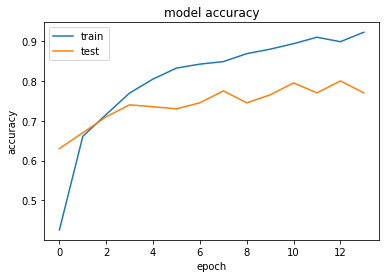

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

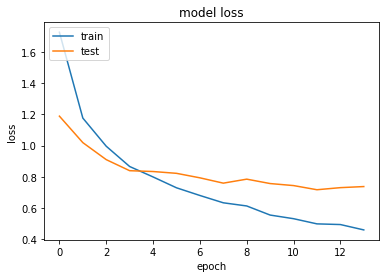

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()